In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit/application_train.csv
/kaggle/input/home-credit/application_test.csv


## **Home Credit Group :**
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

##### **1.1  Business Question :**
While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

#### 1.2 Problem Statement:
Building a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan.

##### 1.3 Application_train/Application_test: 
The main training data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET column 
indicating 0: the loan was repaid or 1: the loan was not repaid. Here we will use only the Training data.

We are using ‘application_train.csv’ file :
1. This dataset consists of 307511 rows and 122 columns.
2. Each row has unique id ‘SK_ID_CURR’ and the output label is in the ‘TARGET’ column.
3. TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
4. The description of each column can be found in the file ‘HomeCredit_columns_description.csv’

## 1 Plotting for Exploratory Data Analysis (EDA) :

EDA is a task of analyzing data using simple tools from statistics,from plotting tools,linear algebra and other technical tools. For any given problem first have to define EDA to analyse what data it is.

### 1.1 Home Credit Dataset :

#### 1.1.1 Importing packages :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date, timedelta

Start and get input : Let's load the required libraries and read the input files.

In [3]:
df=pd.read_csv("/kaggle/input/home-credit/application_train.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Review input : Lets try to view first few lines of both the data frames and also get some info and stats about it.

In [4]:
#Q: How many data points and features ?
df.shape

(307511, 122)

In [5]:
#Q: What are the columns in the dataset ?
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
#Q: Display first five rows 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Q: Display last five rows
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [8]:
#Calculate age 

days_in_year=365.2425 
df['AGE']=(abs(df['DAYS_BIRTH']/days_in_year)).apply(lambda val: int(val))

In [9]:
# convert the days birth value to date
date_of_birth=[]
for i in df['DAYS_BIRTH']:
    date_of_birth.append(pd.to_datetime((date.today() + timedelta(i)).isoformat()))
df['DAYS_BIRTH']=date_of_birth

#### Fuction to segregate descrete and continuous varaible and devide them into Numeric and Categorical

In [10]:
def get_column_type (df):
    import pandas as pd
    import numpy as np
   
    #Numerical columns
    numerical_columns=df.describe().columns
    print('Numerical Columns:\n', numerical_columns)
    
    # Charecter Columns
    char_columns=df.describe(include='object').columns
    print('Charecter Columns:\n', char_columns)
    
    print('Length of numerical columns: ', len(numerical_columns))
    print('Length of charecter columns: ', len(char_columns))
    
    # Making all the values as pandas table
    table_information_numerical=[]
    for i in df[numerical_columns]:
        table_information_numerical.append([i,df[i].nunique()])
    table_information_char=[]
    for i in df[char_columns]:
        table_information_char.append([i,df[i].nunique()])
    
    table_information_numerical=pd.DataFrame(table_information_numerical)
    table_information_char=pd.DataFrame(table_information_char)

    
    # Sperarating numerical continuous columns
    numerical_cont=table_information_numerical[table_information_numerical[1]>33][0].values
    print('Total numerical continuous columns: ', len(numerical_cont))
    print(numerical_cont)
    
    # Separating numerical class columns
    numerical_class=table_information_numerical[table_information_numerical[1]<=33][0].values
    print('Total numerical class columns: ', len(numerical_class))
    print(numerical_class)
    
    return df, numerical_cont, numerical_class, char_columns

Creating Functions to import null value code and memory management :
    

In [11]:
# '''This function is to perform null value treatment on given data using given threshold'''
def null_treated (df, threshold=30):
    import pandas as pd
    import numpy as np
    
    #Identifying percentage of null values
    null_value_treatment=(df.isna().sum()/df.shape[0])*100
    print(null_value_treatment)
    
    #Threshold for null treatment. If user doesn't pass any value, default is 30%
    null_values_threshold = threshold
    
    # Dropping columns based on threshold
    dropped_columns=null_value_treatment[null_value_treatment>null_values_threshold].index
    print('Dropped Columns:\n', dropped_columns)
    
    # Retained columns based on threashold
    retained_columns=null_value_treatment[null_value_treatment<null_values_threshold].index
    print('Retained Columns:\n', retained_columns)
    
    #Numerical columns
    numerical_columns=df[retained_columns].describe().columns
    print('Numerical Columns:\n', numerical_columns)
    
    # Charecter Columns
    char_columns=df[retained_columns].describe(include='object').columns
    print('Charecter Columns:\n', char_columns)
    
    print('Length of retained columns: ', len(retained_columns))
    print('Length of dropped columns: ', len(dropped_columns))
    print('Length of numerical columns: ', len(numerical_columns))
    print('Length of charecter columns: ', len(char_columns))
    
    # Making all the values as pandas table
    import pandas as pd
    table_information_numerical=[]
    for i in df[numerical_columns]:
        table_information_numerical.append([i,df[i].nunique()])
    table_information_char=[]
    for i in df[char_columns]:
        table_information_char.append([i,df[i].nunique()])
    
    table_information_numerical=pd.DataFrame(table_information_numerical)
    table_information_char=pd.DataFrame(table_information_char)

    
    # Sperarating numerical continuous columns
    numerical_cont=table_information_numerical[table_information_numerical[1]>33][0].values
    print('Total numerical continuous columns: ', len(numerical_cont))
    print(numerical_cont)
    
    # Separating numerical class columns
    numerical_class=table_information_numerical[table_information_numerical[1]<=33][0].values
    print('Total numerical class columns: ', len(numerical_class))
    print(numerical_class)
    
    # Filling null values for retained columns
    df.drop(dropped_columns,axis=1,inplace=True)
    for i in char_columns:
        df[i].fillna(df[i].mode().values[0],inplace=True)
    for i in numerical_cont:
        df[i].fillna(df[i].median(),inplace=True)
    for i in numerical_class:
        df[i].fillna(df[i].mode().values[0],inplace=True)
        
    print("Null columns after treatment: ", df.isna().sum().sum())
    
    return df, numerical_cont, numerical_class, char_columns


In [12]:
df, numerical_cont, numerical_class, char_columns =get_column_type(df)

Numerical Columns:
 Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'],
      dtype='object', length=106)
Charecter Columns:
 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Length of numerical columns:  106
Length of charecter c

In [13]:
numerical_class
char_columns

array(['TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_1

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [14]:
my_cols =pd.DataFrame( {'COLUMNS' : ['AMT_GOODS_PRICE', 'FLAG_WORK_PHONE' ,'DAYS_BIRTH','TARGET','AGE',
 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_9']})

In [15]:
my_cols

,COLUMNS
0,AMT_GOODS_PRICE
1,FLAG_WORK_PHONE
2,DAYS_BIRTH
3,TARGET
4,AGE
5,REGION_POPULATION_RELATIVE
6,FLAG_DOCUMENT_9


In [16]:
variable_type=[]
for i in my_cols['COLUMNS']:
    if i in numerical_cont:
        variable_type.append('NUM_CONT')
    elif i in numerical_class:
        variable_type.append('NUM_CLASS')
    else:
        variable_type.append('CHAR')
my_cols['COLUMN_TYPE']=variable_type
    

In [17]:
my_cols_cont=my_cols[my_cols['COLUMN_TYPE']=='NUM_CONT']
my_cols_class=my_cols[my_cols['COLUMN_TYPE']=='NUM_CLASS']
my_cols_char=my_cols[my_cols['COLUMN_TYPE']=='CHAR']

In [18]:
my_cols_cont
my_cols_class
my_cols_char

,COLUMNS,COLUMN_TYPE
0,AMT_GOODS_PRICE,NUM_CONT
4,AGE,NUM_CONT
5,REGION_POPULATION_RELATIVE,NUM_CONT


,COLUMNS,COLUMN_TYPE
1,FLAG_WORK_PHONE,NUM_CLASS
3,TARGET,NUM_CLASS
6,FLAG_DOCUMENT_9,NUM_CLASS


,COLUMNS,COLUMN_TYPE
2,DAYS_BIRTH,CHAR


In [19]:
df[my_cols_cont['COLUMNS']]

,AMT_GOODS_PRICE,AGE,REGION_POPULATION_RELATIVE
0,351000.0,25,0.018801
1,1129500.0,45,0.003541
2,135000.0,52,0.010032
3,297000.0,52,0.008019
4,513000.0,54,0.028663
...,...,...,...
307506,225000.0,25,0.032561
307507,225000.0,56,0.025164
307508,585000.0,40,0.005002
307509,319500.0,32,0.005313


#### EDA for 1 continuous variables

<Figure size 1440x360 with 0 Axes>

(array([1.31712e+05, 1.15261e+05, 4.36580e+04, 1.24290e+04, 3.17500e+03,
        9.33000e+02, 3.00000e+01, 1.70000e+01, 8.00000e+00, 1.00000e+01]),
 array([  40500.,  441450.,  842400., 1243350., 1644300., 2045250.,
        2446200., 2847150., 3248100., 3649050., 4050000.]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'AMT_GOODS_PRICE')

<Figure size 1440x360 with 0 Axes>

(array([12233., 32953., 39476., 42855., 41405., 35194., 34997., 33097.,
        27418.,  7883.]),
 array([20. , 24.9, 29.8, 34.7, 39.6, 44.5, 49.4, 54.3, 59.2, 64.1, 69. ]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'AGE')

<Figure size 1440x360 with 0 Axes>

(array([50417., 62475., 74375., 51862., 46528.,     0., 13442.,     0.,
            0.,  8412.]),
 array([0.00029  , 0.0075118, 0.0147336, 0.0219554, 0.0291772, 0.036399 ,
        0.0436208, 0.0508426, 0.0580644, 0.0652862, 0.072508 ]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'REGION_POPULATION_RELATIVE')

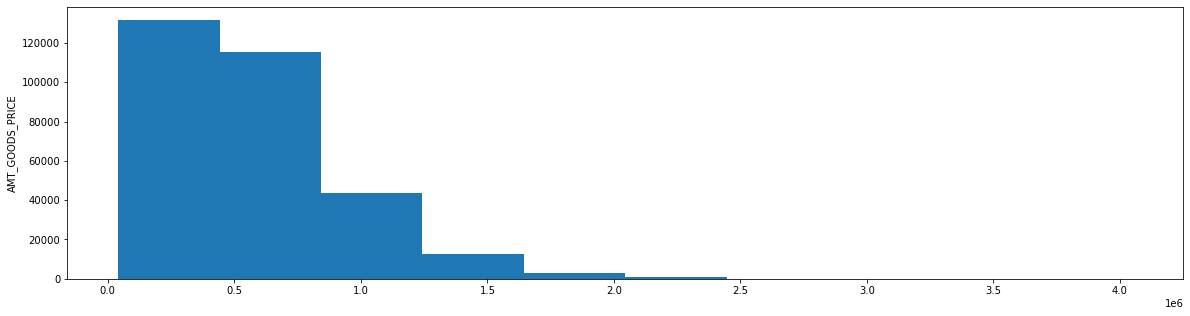

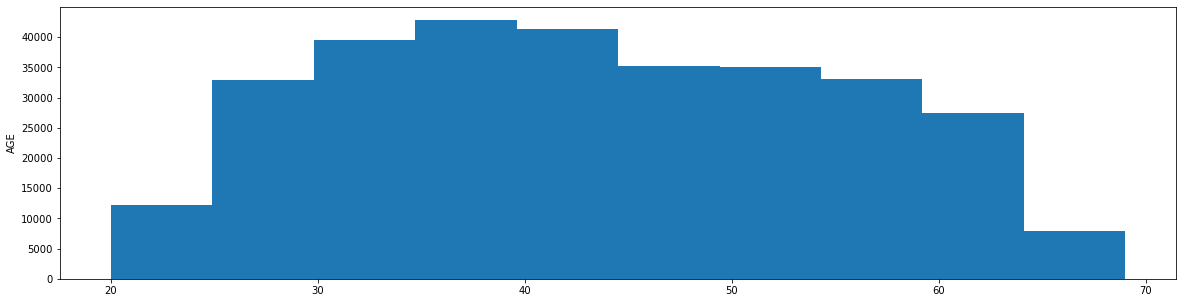

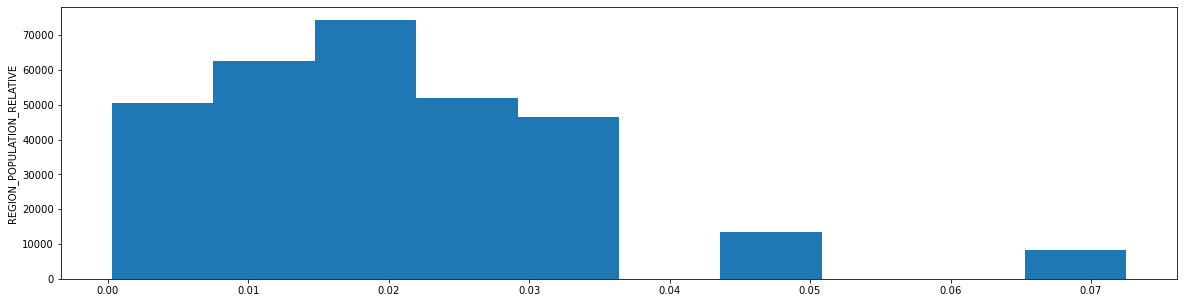

In [20]:
for i in my_cols_cont['COLUMNS']:
    plt.figure(figsize=(20,5))
    plt.hist(df[i])
    plt.ylabel(i)

In [21]:
df['AGE'].describe()

count    307511.000000
mean         43.405442
std          11.945936
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

<Figure size 1440x360 with 0 Axes>

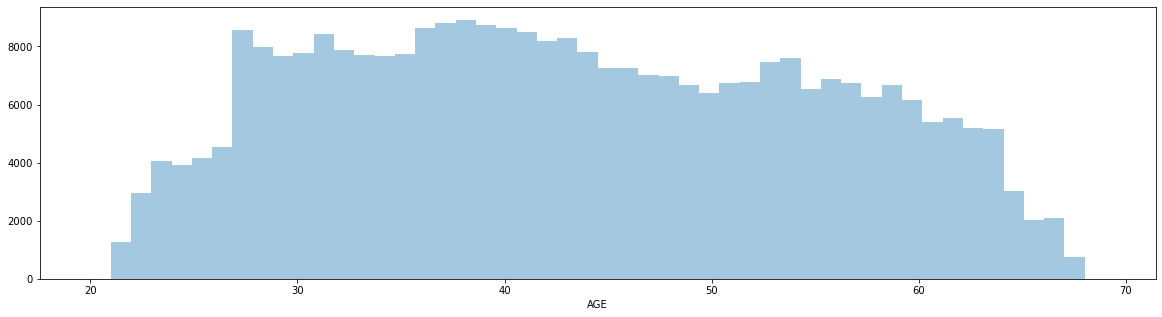

In [22]:
#With Seaborn x axis depicts column value
plt.figure(figsize=(20,5))
sns.distplot(df['AGE'],kde=False)
    

* Min age is 20 and max is 70
* Normal Distribution

In [23]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [24]:
df['AMT_GOODS_PRICE'].describe()

count    307233.00000
mean     538396.20743
std      369446.46054
min       40500.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     4050000.00000
Name: AMT_GOODS_PRICE, dtype: float64

<Figure size 1440x720 with 0 Axes>

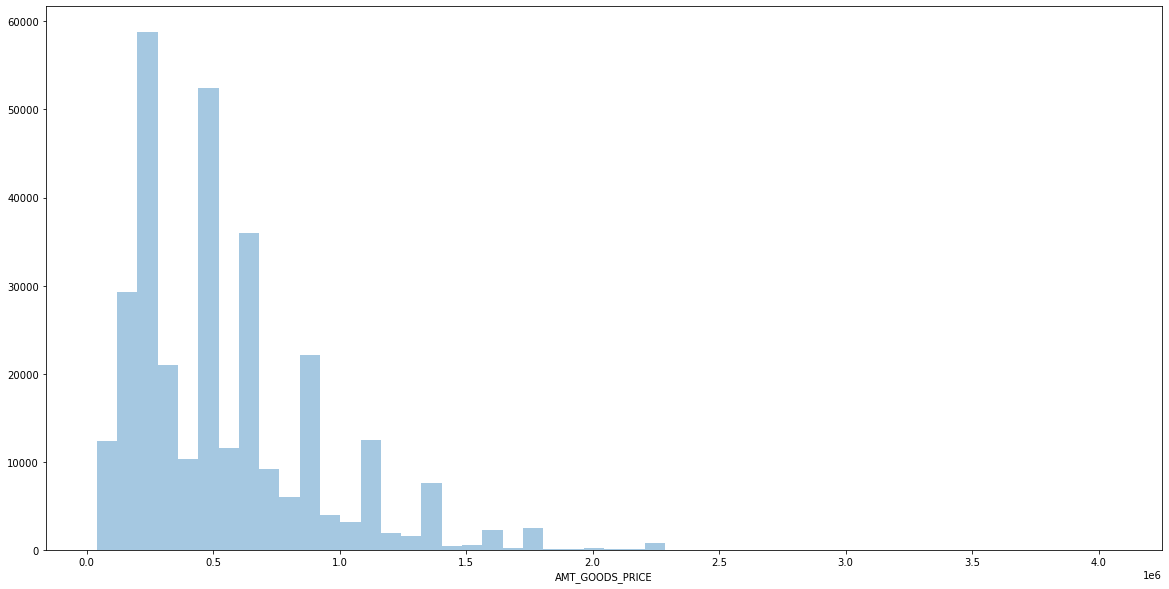

In [25]:
plt.figure(figsize=(20,10))
sns.distplot(df['AMT_GOODS_PRICE'],kde=False)

In [41]:
df['REGION_POPULATION_RELATIVE'].describe()

count   307511.00000
mean         0.02087
std          0.01383
min          0.00029
25%          0.01001
50%          0.01885
75%          0.02866
max          0.07251
Name: REGION_POPULATION_RELATIVE, dtype: float64

<Figure size 1440x720 with 0 Axes>

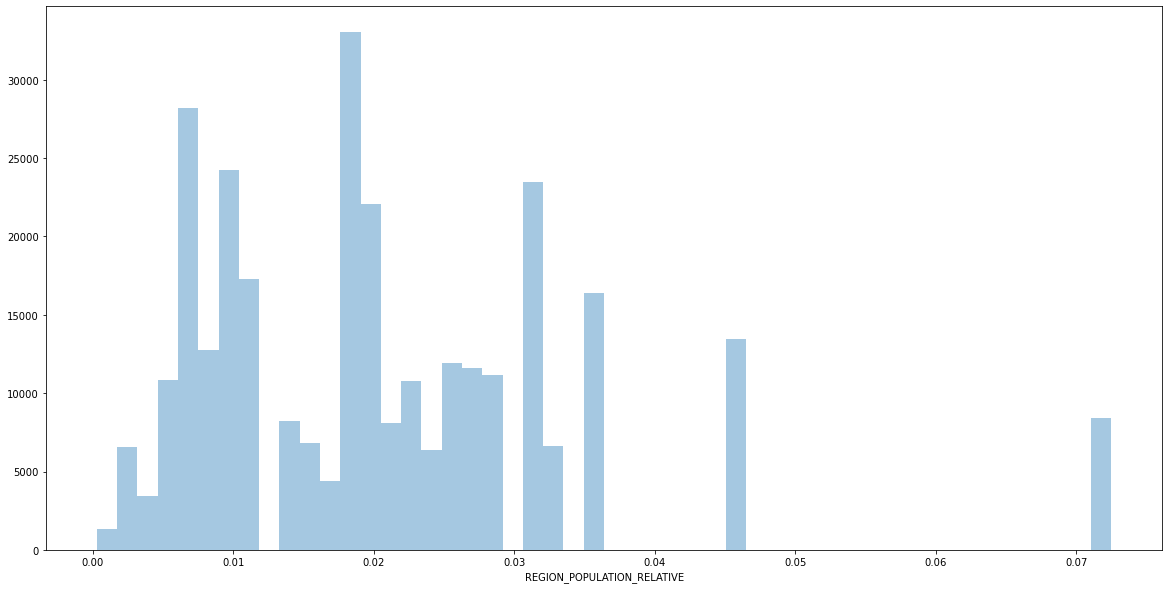

In [26]:
plt.figure(figsize=(20,10))
sns.distplot(df['REGION_POPULATION_RELATIVE'],kde=False)

Interpretaion:
* 10k loan consumer lives in a area where population is very high.
* More than 30K consumer lives in a area where population is average.


#### Heatmap to study relationship between two or numeric continuous variables

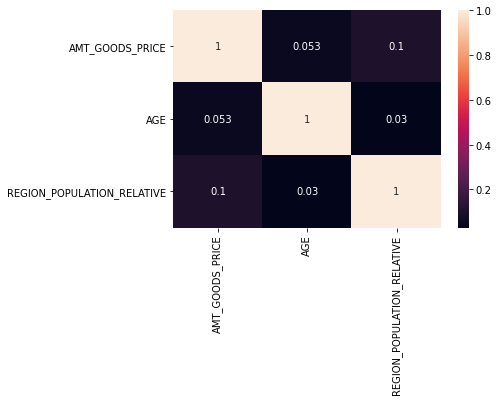

In [27]:
sns.heatmap(df[my_cols_cont['COLUMNS']].corr(), annot=True)

Interpretaion:
* There is no correaltion between thease contiunous variable. Those are independent

In [28]:
new_df=pd.DataFrame(df['DAYS_BIRTH'].groupby(df['DAYS_BIRTH']).count())
#new_df.index.names = ['date']

In [29]:
birth_quarters=pd.DataFrame(new_df.DAYS_BIRTH.resample('Q').count())
birth_quarters

,DAYS_BIRTH
DAYS_BIRTH,
1951-06-30,18
1951-09-30,72
1951-12-31,80
1952-03-31,84
1952-06-30,89
...,...
1998-12-31,87
1999-03-31,88
1999-06-30,55


<Figure size 1440x360 with 0 Axes>

Text(0.5, 0, 'Quarter')

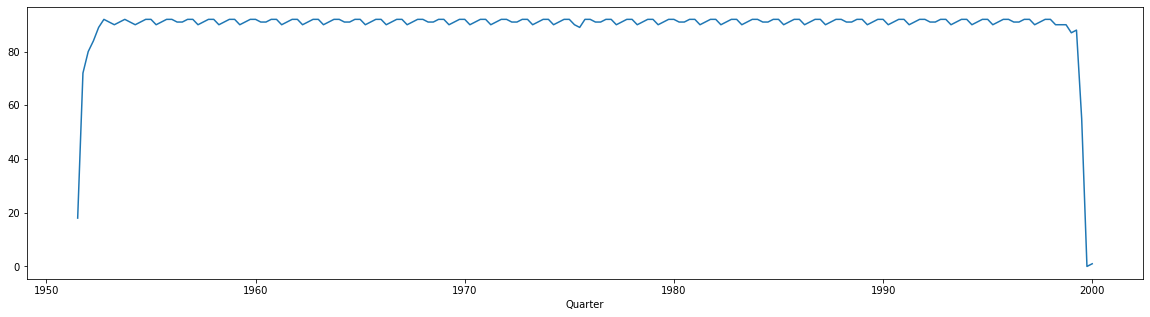

In [30]:
plt.figure(figsize=(20,5))
plt.plot(birth_quarters['DAYS_BIRTH'])
plt.xlabel('Quarter')

Interpretaion :
* 90% of the Loan Consumer are born beweent 1955 to 19

<Figure size 1440x1440 with 0 Axes>

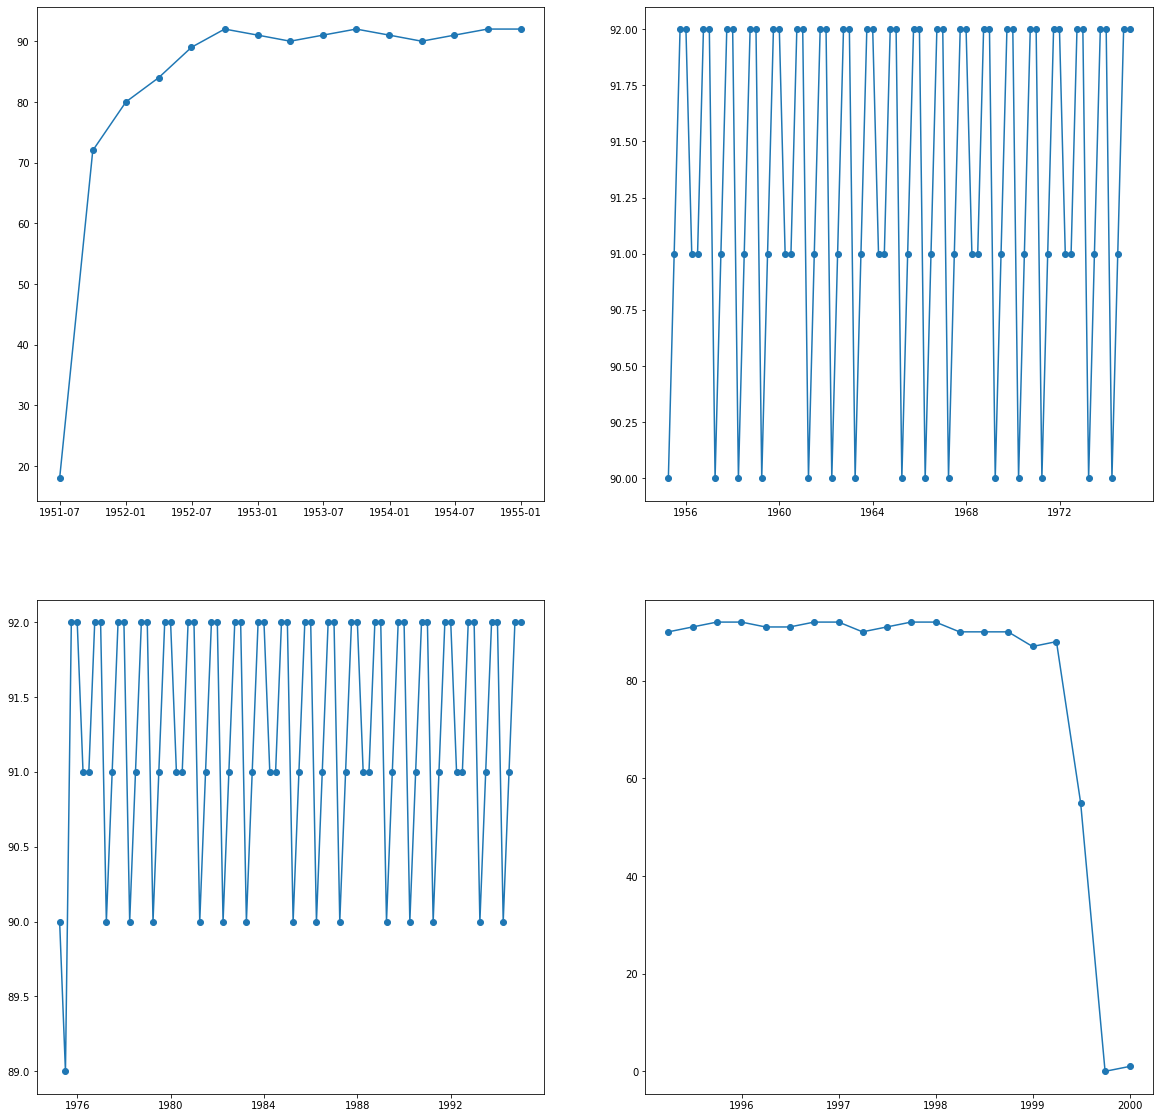

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(birth_quarters[birth_quarters.index < '1955-01-01'],marker='o')
plt.subplot(2,2,2)
plt.plot(birth_quarters[(birth_quarters.index >= '1955-01-01') & (birth_quarters.index < '1975-01-01')],marker='o')
plt.subplot(2,2,3)
plt.plot(birth_quarters[(birth_quarters.index >= '1975-01-01') & (birth_quarters.index < '1995-01-01')],marker='o')
plt.subplot(2,2,4)
plt.plot(birth_quarters[(birth_quarters.index >= '1995-01-01') & (birth_quarters.index < '2020-01-01')],marker='o')

Interpretaion:
* There are very less loan consumers born after third quarter 1999

In [32]:
df[my_cols_class['COLUMNS']].nunique() #numeric

FLAG_WORK_PHONE    2
TARGET             2
FLAG_DOCUMENT_9    2
dtype: int64

### Plot between two continues variable
* between Age and Good_Price
* between Age and Region_population_relative
* beween Good_Price and Region_population_relative

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'AMT_GOODS_PRICE')

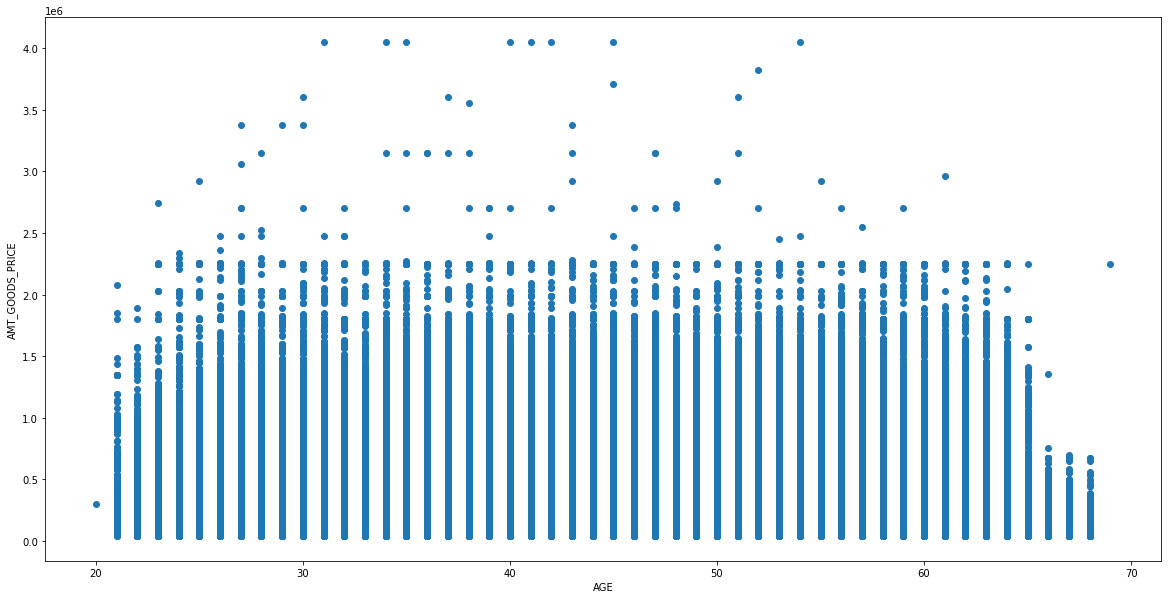

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(df['AGE'],df['AMT_GOODS_PRICE'])
plt.xlabel('AGE')
plt.ylabel('AMT_GOODS_PRICE')

Interpretaion:
* For age group 25 to 65, average goods price lies between 200k to 250k for loan amount.
* for age group 65+ average goods price is 60k
* for 20 years age people goods price for loan amount is 40K
* 2 to 3 percent customer has taken loan on very high goods price.
* minimum and maximum age for high goods price loan amount is 32 and 55
* most of the time when age is increasing amount is constant

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

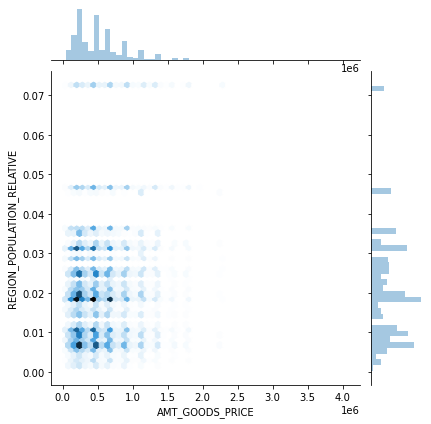

In [34]:
plt.figure(figsize=(20,10))
sns.jointplot('AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', data=df, kind='hex')


### Analysis of one class variable and on contenuous variable
* AGE and FLAG_WORK_PHONE
* AGE and TARGET
* AGE and FLAG_DOCUMENT_9
	


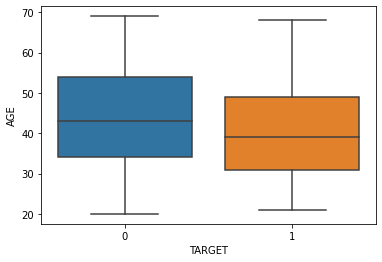

In [43]:
sns.boxplot('TARGET','AGE',data=df)

* People who dont pay EMI average age is 43
* People who pays EMI their age is more than 34
* More than age 50 do not pay EMI on Time
* 75% of the people age who pays EMI are more that 31 and less then 49 Years
* 75% of the people age whoc dont pay EMI are more than 34 and less then 54 years

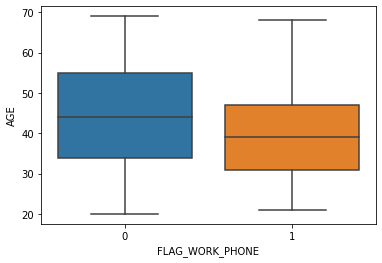

In [44]:
sns.boxplot('FLAG_WORK_PHONE','AGE',data=df)

Analysis beween age and Target vs age and flag_work_phone is similar
* Who pays EMI provide th phone number who doesnt they dont

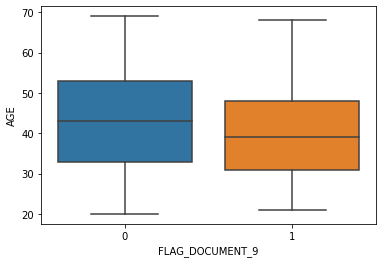

In [45]:
sns.boxplot('FLAG_DOCUMENT_9','AGE',data=df)

This is similar to work phone

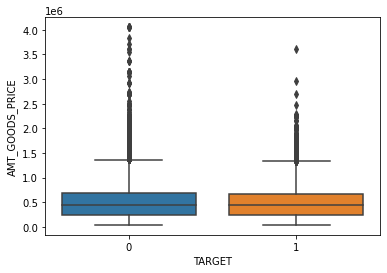

In [46]:
sns.boxplot('TARGET','AMT_GOODS_PRICE',data=df)

* Outliers are consumers who takes loan on more than 150 lac goods price
* Average goods price for loan amount is 50 lac for both who pays EMI or not.

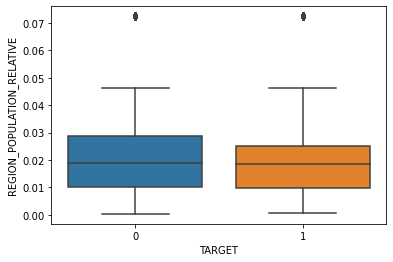

In [47]:
sns.boxplot('TARGET','REGION_POPULATION_RELATIVE',data=df)

* Outliers are consumer who stays very populated area 


<Figure size 1440x720 with 0 Axes>

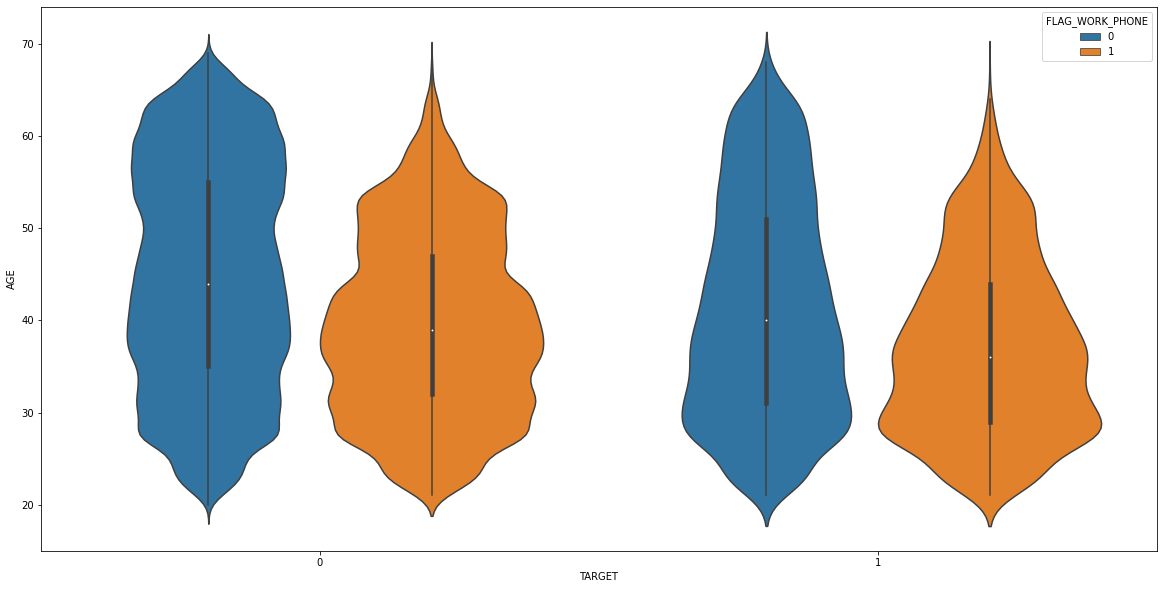

In [54]:
plt.figure(figsize=(20,10))
sns.violinplot('TARGET','AGE',data=df,hue='FLAG_WORK_PHONE')

* 

### Preprocessing

#### Null Value Treatment